# Basic Data Analysis in Python using the Drosophila Connectome
The Drosophila connectime is a publicly available dataset of neurons and connections within a single fruit fly brain. To learn more about the Drosophila connectome, explore these resources.

[Fruit Fly Brain Observatory](https://hemibrain.neuronlp.fruitflybrain.org)

[Neuprint](https://neuprint.janelia.org/)

[Codex Flywire Explorer](https://codex.flywire.ai)

In today's tutorial, we will be accessing the Hemibrain data from Janelia via the Neuprint API. You can reference the [documentation](https://connectome-neuprint.github.io/neuprint-python/docs/queries.html) to learn more about querying the Hemibrain connectome database.
- Learn to access Drosophila brain data from Neuprint by creating a query
- Access data from a Pandas dataframe with indexing and logical indexing
- Use describe to get quick stats
- Plot a histogram of synaptic sites
- Make a pivot table and heatmap of connections among neurons

# Getting set up
To get started, navigate to this site to create an account and obtain an authorization token: https://connectome-neuprint.github.io/neuprint-python/docs/quickstart.html#client-and-authorization-token. 

Start by entering your client info here to start a Neuprint session. Just copy and paste your token into the space provided. We'll also import the most important packages we'll need.

In [ ]:
# in Google Colab, run this cell to install the neuprint-python package
%pip install neuprint-python

In [ ]:
from neuprint import Client

# insert personal token above. see https://connectome-neuprint.github.io/neuprint-python/docs/quickstart.html#client-and-authorization-token for instructions
c = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token='')
c.fetch_version()

In [2]:
# import important stuff here
import numpy as np
import pandas as pd

Every neuron, or piece of neuron, has its own body ID. Below is a manually created list of the body IDs for the labeled and annotated clock neurons in the Hemibrain. We'll use these body IDs to access information about these neurons from neuprint.

In [3]:
clock_bodyIds = [2068801704, 1664980698, 2007068523, 1975347348, 5813056917, 5813021192, 5813069648, 511051477,
                  296544364, 448260940, 5813064789, 356818551, 480029788, 450034902, 546977514, 264083994, 5813022274,
                  5813010153, 324846570, 325529237, 387944118, 387166379, 386834269, 5813071319, 1884625521,
                  2065745704, 5813001741, 5813026773]

## Fetch Dataframe of neurons from Neuprint
We'll start by making a query to fetch summary information about each of these neurons using the fetch_neurons function from the neuprint package. This function takes some neuron criteria as its input and returns two dataframes containing summary information about the individual neurons that match the criteria and information about the number of synaptic sites on the neurons. We'll only work with the first dataframe.

In [4]:
from neuprint import fetch_neurons

neuron_df, _ = fetch_neurons(clock_bodyIds)

Display the dataframe below and notice that it has many columns with information about this set of 28 clock neurons. In addition to a bodyId, each neuron has a type and an instance label. The pre and post columns indicate the numbers of presynaptic and postsynaptic sites that are attributed to the neuron. The presynaptic sites are where the neuron would be releasing neurotransmitters from. The postsynaptic sites on the neuron are where it is receiving inputs. Mito is the number of mitochondria that were counted in the neuron. CellBodyFiber is related to the hemilineage of the neuron. It indicates which neurons likely derived from the same stem cell.

For the purposes of this tutorial, let's work with the counts of synaptic sites.

In [5]:
neuron_df

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,264083994,DN1a_R,DN1a,395,1277,2847,1277,326,1277856419,Traced,False,Roughly traced,PDM10,270.0,"[11339, 22506, 4104]","{'SNP(R)': {'pre': 232, 'post': 1037, 'downstr...",None,"[AME(R), CA(R), INP, MB(+ACA)(R), MB(R), OL(R)...","[AME(R), CA(R), INP, MB(+ACA)(R), MB(R), OL(R)..."
1,296544364,LNd_R,LNd,281,733,2068,733,284,1629467924,Traced,False,Roughly traced,ADL30,451.5,"[4088, 26003, 19232]","{'SNP(R)': {'pre': 219, 'post': 692, 'downstre...",aSP7a candidates,"[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]","[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
2,324846570,DN1pA_R,DN1pA,187,451,1085,451,153,835395927,Traced,False,Roughly traced,PDM24,278.0,"[17791, 19036, 5000]","{'SNP(R)': {'pre': 99, 'post': 371, 'downstrea...",None,"[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]","[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
3,325529237,DN1pA_R,DN1pA,201,443,1161,443,148,823942629,Traced,False,Roughly traced,PDM24,339.0,"[17387, 19226, 5776]","{'SNP(R)': {'pre': 116, 'post': 373, 'downstre...",None,"[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]","[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
4,356818551,LPN_R,LPN,646,1511,4668,1511,396,1966628095,Traced,False,Roughly traced,PDL18,366.0,"[8635, 11798, 15840]","{'SNP(R)': {'pre': 636, 'post': 1381, 'downstr...",None,"[CA(R), INP, MB(+ACA)(R), MB(R), PLP(R), SCL(R...","[INP, MB(+ACA)(R), PLP(R), SCL(R), SIP(R), SLP..."
5,386834269,DN1pB_R,DN1pB,572,1121,3504,1121,328,1899760660,Traced,False,Roughly traced,PDM24,357.0,"[18893, 20415, 3856]","{'SNP(R)': {'pre': 427, 'post': 921, 'downstre...",None,"[AOTU(R), INP, PLP(R), SCL(R), SIP(R), SLP(R),...","[AOTU(R), INP, PLP(R), SCL(R), SIP(R), SLP(R),..."
6,387166379,DN1pA_R,DN1pA,178,494,1025,494,163,836685076,Traced,False,Roughly traced,PDM24,301.0,"[16224, 19247, 5372]","{'SNP(R)': {'pre': 89, 'post': 397, 'downstrea...",None,"[MB(+ACA)(R), SLP(R), SMP(L), SMP(R), SNP(L), ...","[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
7,387944118,DN1pA_R,DN1pA,144,468,775,468,163,767049416,Traced,False,Roughly traced,PDM24,319.5,"[16744, 19299, 4696]","{'SNP(R)': {'pre': 83, 'post': 358, 'downstrea...",PD2f1 (Dolan et al. eLife 2019),"[PLP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R...","[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
8,448260940,LNd_R,LNd,255,863,1968,863,383,1659640924,Traced,False,Roughly traced,ADL30,376.5,"[3107, 25129, 18592]","{'SNP(R)': {'pre': 181, 'post': 786, 'downstre...",aSP7a candidates,"[MB(+ACA)(R), SIP(R), SLP(R), SMP(L), SMP(R), ...","[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
9,450034902,LPN_R,LPN,369,1099,2593,1099,292,1447849563,Traced,False,Roughly traced,PDL18,361.0,"[10497, 12517, 15648]","{'SNP(R)': {'pre': 365, 'post': 1049, 'downstr...",None,"[INP, MB(+ACA)(R), SCL(R), SLP(R), SMP(R), SNP...","[INP, SCL(R), SLP(R), SMP(R), SNP(R)]"


# Working with a Pandas dataframe
The Pandas dataframe is similar to an Excel spreadsheet. We can use code to grab the data that we want from it. 

In [6]:
# get the columns with cell type and post sites
neuron_df[['type','post']]

,type,post
0,DN1a,1277
1,LNd,733
2,DN1pA,451
3,DN1pA,443
4,LPN,1511
5,DN1pB,1121
6,DN1pA,494
7,DN1pA,468
8,LNd,863
9,LPN,1099


In [7]:
# get the first row of the dataframe
neuron_df.iloc[0]

bodyId                                                   264083994
instance                                                    DN1a_R
type                                                          DN1a
pre                                                            395
post                                                          1277
downstream                                                    2847
upstream                                                      1277
mito                                                           326
size                                                    1277856419
status                                                      Traced
cropped                                                      False
statusLabel                                         Roughly traced
cellBodyFiber                                                PDM10
somaRadius                                                   270.0
somaLocation                                  [11339, 22506, 4

In [8]:
# another way to get the first row of the dataframe
neuron_df[0:1]

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,264083994,DN1a_R,DN1a,395,1277,2847,1277,326,1277856419,Traced,False,Roughly traced,PDM10,270.0,"[11339, 22506, 4104]","{'SNP(R)': {'pre': 232, 'post': 1037, 'downstr...",None,"[AME(R), CA(R), INP, MB(+ACA)(R), MB(R), OL(R)...","[AME(R), CA(R), INP, MB(+ACA)(R), MB(R), OL(R)..."


In [9]:
# get the first three rows of the dataframe
neuron_df[0:3]

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,264083994,DN1a_R,DN1a,395,1277,2847,1277,326,1277856419,Traced,False,Roughly traced,PDM10,270.0,"[11339, 22506, 4104]","{'SNP(R)': {'pre': 232, 'post': 1037, 'downstr...",None,"[AME(R), CA(R), INP, MB(+ACA)(R), MB(R), OL(R)...","[AME(R), CA(R), INP, MB(+ACA)(R), MB(R), OL(R)..."
1,296544364,LNd_R,LNd,281,733,2068,733,284,1629467924,Traced,False,Roughly traced,ADL30,451.5,"[4088, 26003, 19232]","{'SNP(R)': {'pre': 219, 'post': 692, 'downstre...",aSP7a candidates,"[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]","[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
2,324846570,DN1pA_R,DN1pA,187,451,1085,451,153,835395927,Traced,False,Roughly traced,PDM24,278.0,"[17791, 19036, 5000]","{'SNP(R)': {'pre': 99, 'post': 371, 'downstrea...",None,"[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]","[SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"


## Indexing with logical expressions
Let's say we wanted to grab only the rows that have information for the LNd cell type. We can use a logical expression in square brackets.

In [10]:
# get the LNd rows of the dataframe
neuron_df[neuron_df['type'] == 'LNd']

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
1,296544364,LNd_R,LNd,281,733,2068,733,284,1629467924,Traced,False,Roughly traced,ADL30,451.5,"[4088, 26003, 19232]","{'SNP(R)': {'pre': 219, 'post': 692, 'downstre...",aSP7a candidates,"[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]","[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
8,448260940,LNd_R,LNd,255,863,1968,863,383,1659640924,Traced,False,Roughly traced,ADL30,376.5,"[3107, 25129, 18592]","{'SNP(R)': {'pre': 181, 'post': 786, 'downstre...",aSP7a candidates,"[MB(+ACA)(R), SIP(R), SLP(R), SMP(L), SMP(R), ...","[SIP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R)]"
21,5813021192,LNd_R,LNd,574,1258,3660,1258,498,2664402521,Traced,False,Roughly traced,ADL30,636.5,"[3004, 25925, 19600]","{'SNP(R)': {'pre': 286, 'post': 860, 'downstre...",None,"[INP, MB(+ACA)(R), PLP(R), SCL(R), SLP(R), SMP...","[MB(+ACA)(R), PLP(R), SLP(R), SMP(L), SMP(R), ..."
24,5813056917,LNd_R,LNd,549,1366,3572,1366,566,2692119241,Traced,False,Roughly traced,ADL30,346.0,"[1890, 24480, 18372]","{'SNP(R)': {'pre': 213, 'post': 851, 'downstre...",None,"[INP, MB(+ACA)(R), PLP(R), SCL(R), SLP(R), SMP...","[PLP(R), SLP(R), SMP(L), SMP(R), SNP(L), SNP(R..."
25,5813064789,LNd_R,LNd,278,790,1974,790,382,1689845086,Traced,False,Roughly traced,ADL30,411.0,"[2686, 24340, 17692]","{'SNP(R)': {'pre': 276, 'post': 790, 'downstre...",aSP7a candidates,"[MB(+ACA)(R), SIP(R), SLP(R), SMP(R), SNP(R), ...","[SLP(R), SMP(R), SNP(R)]"
26,5813069648,LNd_R,LNd,636,1748,4385,1748,660,3009429227,Traced,False,Roughly traced,ADL30,703.0,"[2384, 24740, 19544]","{'SNP(R)': {'pre': 296, 'post': 402, 'downstre...",None,"[AME(R), ICL(R), INP, LH(R), LO(R), ME(R), OL(...","[AME(R), ICL(R), INP, LO(R), OL(R), PLP(R), PV..."


Take a moment to see what that logical expression inside the square brackets is. It is a Boolean data type with True/False entries. Only the rows that have 'LNd' in the 'type' column have a True entry.

In [11]:
neuron_df['type'] == 'LNd'

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24     True
25     True
26     True
27    False
Name: type, dtype: bool

# Basic statistics with a dataframe
There are many Python methods for doing basic stats on a column of values from a dataframe. Below, I apply some of those methods to the 'post' column of the dataframe.

In [12]:
# get some summary stats about the post sites
neuron_df['post'].describe()

count      28.000000
mean      769.321429
std       483.531305
min       132.000000
25%       431.250000
50%       621.500000
75%      1154.500000
max      1748.000000
Name: post, dtype: float64

In [13]:
# get only the mean of the post sites
neuron_df['post'].mean()

769.3214285714286

In [14]:
# get only the mode of the post sites
neuron_df['post'].mode()

0    468
Name: post, dtype: int64

## Histogram plot
Use matplotlib to create a simple histogram from the values in the 'post' column of the dataframe.

Text(0.5, 1.0, 'Distribution of Post Sites for Clock Neurons')

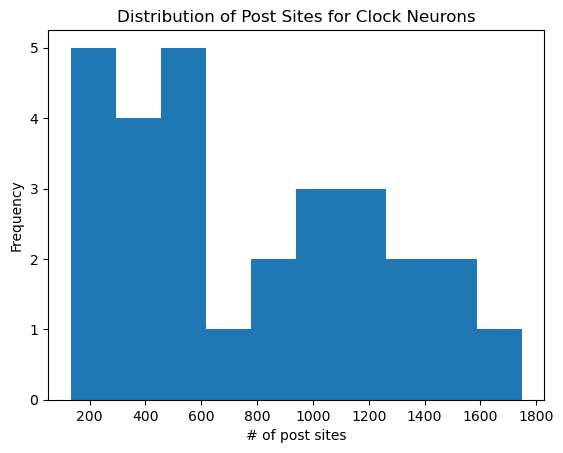

In [15]:
# make a histogram of the post sites
import matplotlib.pyplot as plt

# choose the number of bins for your histogram
plt.hist(neuron_df['post'], bins=10)

# add labels and title
plt.xlabel('# of post sites')
plt.ylabel('Frequency')
plt.title('Distribution of Post Sites for Clock Neurons')

# Pivot table of neuron connectivity
To explore the connections that the clock neurons make with each other, we'll do another query with neuprint to obtain the data about those connections. This will return a dataframe that I have called 'connections'. It contains information about the strength of connections among the clock neurons.

In [16]:
# obtain dataframe of connections
from neuprint import fetch_simple_connections

connections = fetch_simple_connections(clock_bodyIds,clock_bodyIds)
connections

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,264083994,5813069648,81,DN1a,LNd,DN1a_R,LNd_R,"{'SNP(R)': {'pre': 22, 'post': 22}, 'SLP(R)': ..."
1,5813022274,5813069648,75,DN1a,LNd,DN1a_R,LNd_R,"{'VLNP(R)': {'pre': 43, 'post': 44}, 'PLP(R)':..."
2,5813022274,511051477,63,DN1a,s-LNv,DN1a_R,5th s-LNv,"{'VLNP(R)': {'pre': 15, 'post': 15}, 'PLP(R)':..."
3,264083994,511051477,55,DN1a,s-LNv,DN1a_R,5th s-LNv,"{'OL(R)': {'pre': 29, 'post': 29}, 'AME(R)': {..."
4,480029788,450034902,45,LPN,LPN,LPN_R,LPN_R,"{'SNP(R)': {'pre': 45, 'post': 45}, 'SMP(R)': ..."
...,...,...,...,...,...,...,...,...
184,5813069648,5813026773,1,LNd,l-LNv,LNd_R,l-LNv,"{'OL(R)': {'pre': 1, 'post': 1}, 'AME(R)': {'p..."
185,5813071319,324846570,1,DN1pB,DN1pA,DN1pB_R,DN1pA_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
186,5813071319,325529237,1,DN1pB,DN1pA,DN1pB_R,DN1pA_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SLP(R)': {'..."
187,5813071319,448260940,1,DN1pB,LNd,DN1pB_R,LNd_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SLP(R)': {'..."


To make a heatmap of the connection strenghs in this dataframe, we need to convert the dataframe into a pivot table. I named it 'matrix'.

In [17]:
# create a pivot table of connections
matrix = connections.pivot(columns='bodyId_pre', index='bodyId_post', values='weight')
matrix

bodyId_pre,264083994,296544364,324846570,325529237,356818551,386834269,387166379,387944118,448260940,450034902,...,2068801704,5813001741,5813010153,5813021192,5813022274,5813026773,5813056917,5813064789,5813069648,5813071319
bodyId_post,,,,,,,,,,,,,,,,,,,,,
264083994,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,1.0,NaN
296544364,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
324846570,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0
325529237,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1.0
356818551,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,2.0,...,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0
386834269,NaN,NaN,3.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5.0
387166379,NaN,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,13.0,2.0
387944118,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,10.0,3.0
448260940,NaN,6.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0


Text(170.72222222222223, 0.5, 'presynaptic')

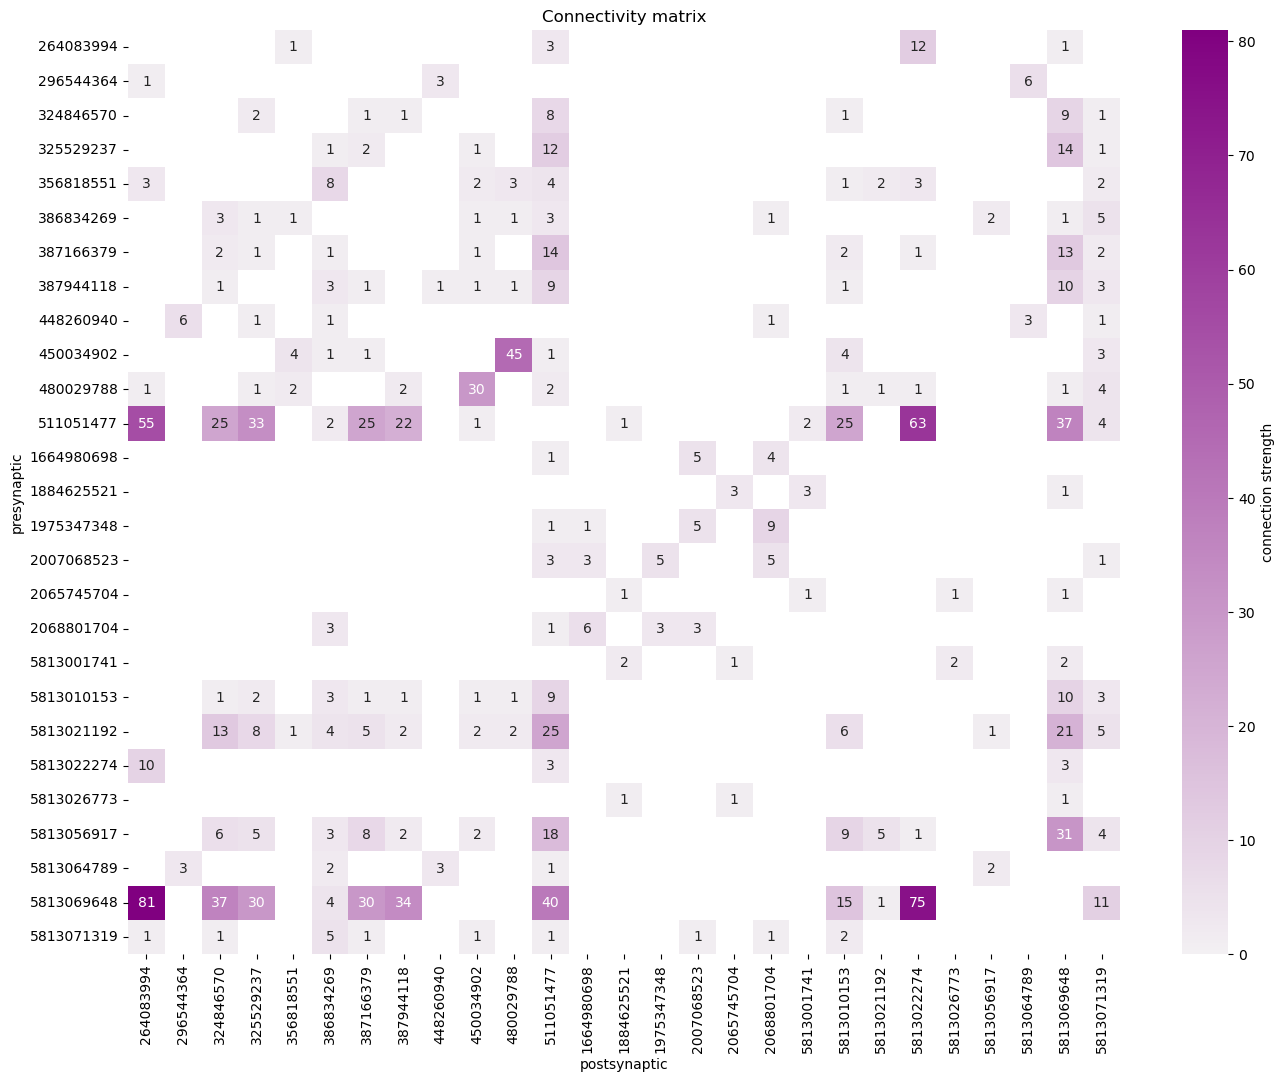

In [18]:
# make a heatmap of the connectivity matrix with seaborn
import seaborn

fig = plt.figure(figsize=(16, 12))
seaborn.heatmap(matrix, vmin=0, annot=True, cmap=seaborn.light_palette("purple", as_cmap=True), cbar_kws={'label': 'connection strength'})
plt.title('Connectivity matrix')
plt.xlabel('postsynaptic')
plt.ylabel('presynaptic')

Another way to show this data would be to collapse the connection strengths by cell type so that we can create an aggregated pivot table and heatmap.

In [19]:
# use the groupby function to get the total connections by type
connections_by_type = connections.groupby(['type_pre', 'type_post'], sort=False)['weight'].sum().reset_index()

# create a pivot table of connections by type
matrix = connections_by_type.pivot(columns='type_post', index='type_pre', values='weight')
matrix

type_post,DN1a,DN1pA,DN1pB,LNd,LPN,l-LNv,s-LNv
type_pre,,,,,,,
DN1a,22.0,1.0,1.0,158.0,8.0,NaN,118.0
DN1pA,NaN,20.0,8.0,211.0,10.0,NaN,130.0
DN1pB,NaN,18.0,10.0,35.0,18.0,NaN,10.0
LNd,4.0,57.0,3.0,85.0,4.0,5.0,37.0
LPN,1.0,6.0,4.0,7.0,86.0,NaN,1.0
l-LNv,NaN,NaN,NaN,NaN,NaN,16.0,3.0
s-LNv,6.0,52.0,7.0,85.0,7.0,NaN,55.0


Text(170.72222222222223, 0.5, 'presynaptic')

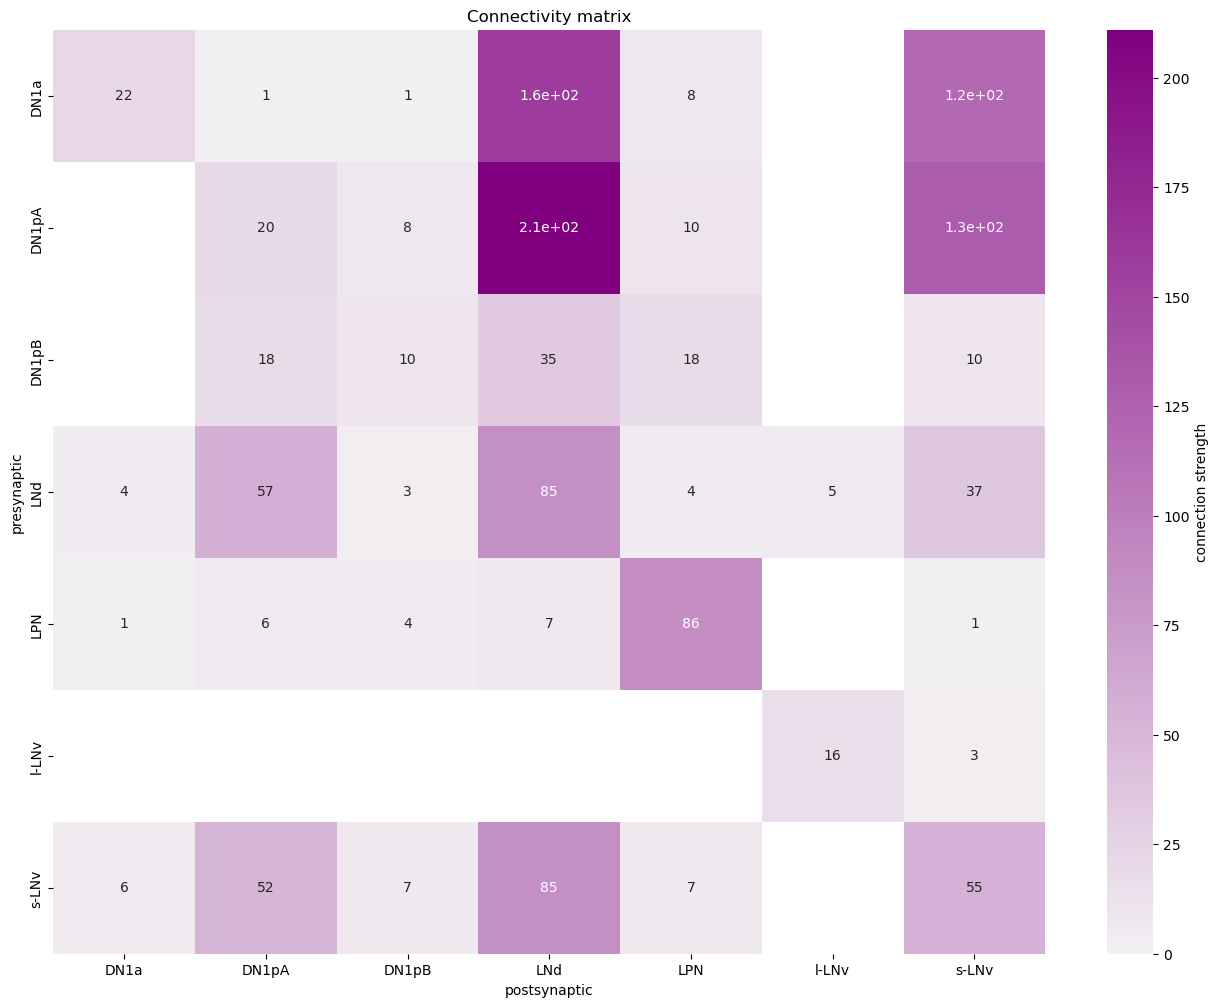

In [20]:
# make a heatmap of the connectivity matrix with seaborn
import seaborn

fig = plt.figure(figsize=(16, 12))
seaborn.heatmap(matrix, vmin=0, annot=True, cmap=seaborn.light_palette("purple", as_cmap=True), cbar_kws={'label': 'connection strength'})
plt.title('Connectivity matrix')
plt.xlabel('postsynaptic')
plt.ylabel('presynaptic')

# It's your turn!
Try a query of your own, or work with the dataframes in this notebook to do some stats on a different column of data. 